Ce notebook vise à traiter les datasets concernant les matchs de tennis, les organiser et faire des modifications/néttoyages nécessaires selon le besoin 

1.Importation des librairies nécessaires 

In [14]:
import pandas as pd 
import missingno as msno
import re
import matplotlib.pyplot as plt

In [51]:
#Lecture des datasets 
df1 = pd.read_csv('Aust_Open_champs_69_21.csv')
df1.head(5)

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Rod Laver,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
1,1970,Arthur Ashe,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2"
2,1971,Ken Rosewall,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3"
3,1972,Ken Rosewall,2,AUS,Malcolm Anderson,8,AUS,"7–6(7–2), 6–3, 7–5"
4,1973,John Newcombe,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5, 6–1"


In [59]:
#Lecture des datasets 
df2 = pd.read_csv('Aust_Open_champs_69_21_wom.csv')
df2.head(10)

,Year,Champion,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
0,1969,Margaret Court,2,AUS,Billie Jean King,1,USA,"6–4, 6–1"
1,1970,Margaret Court,1,AUS,Kerry Melville,2,AUS,"6–1, 6–3"
2,1971,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"2–6, 7–6(7–0), 7–5"
3,1972,Virginia Wade,2,GBR,Evonne Goolagong,1,AUS,"6–4, 6–4"
4,1973,Margaret Court,1,AUS,Evonne Goolagong,2,AUS,"6–4, 7–5"
5,1974,Evonne Goolagong,2,AUS,Chris Evert,1,USA,"7–6(7–5), 4–6, 6–0"
6,1975,Evonne Goolagong,3,AUS,Martina Navratilova,8,TCH,"6–3, 6–2"
7,1976,Evonne Goolagong,1,AUS,Renáta Tomanová,5,TCH,"6–2, 6–2"
8,1977,Kerry Melville Reid,2,AUS,Dianne Fromholtz,1,AUS,"7–5, 6–2"
9,1977,Evonne Goolagong,1,AUS,Helen Gourlay,5,AUS,"6–3, 6–0"


Analyse du df1 'men'

In [52]:
#Suppression des index 
df1.set_index(df1.columns[0], inplace=True)
df1.drop(columns=[df1.columns[0]], inplace=True)
df1.head()

,Seed_Champion,Ctry_Champion,Runner-up,Seed_Runner-up,Ctry_Runner-up,Score in the Final
Year,,,,,,
1969,1,AUS,Andrés Gimeno,9,ESP,"6–3, 6–4, 7–5"
1970,4,USA,Dick Crealy,12,AUS,"6–4, 9–7, 6–2"
1971,2,AUS,Arthur Ashe,3,USA,"6–1, 7–5, 6–3"
1972,2,AUS,Malcolm Anderson,8,AUS,"7–6(7–2), 6–3, 7–5"
1973,2,AUS,Onny Parun,12,NZL,"6–3, 6–7, 7–5, 6–1"


In [31]:
#Vérifier si il y a des colonnes vides 
colonnes_vides = df1.columns[df1.isnull().all()].tolist()
print(colonnes_vides)

[]


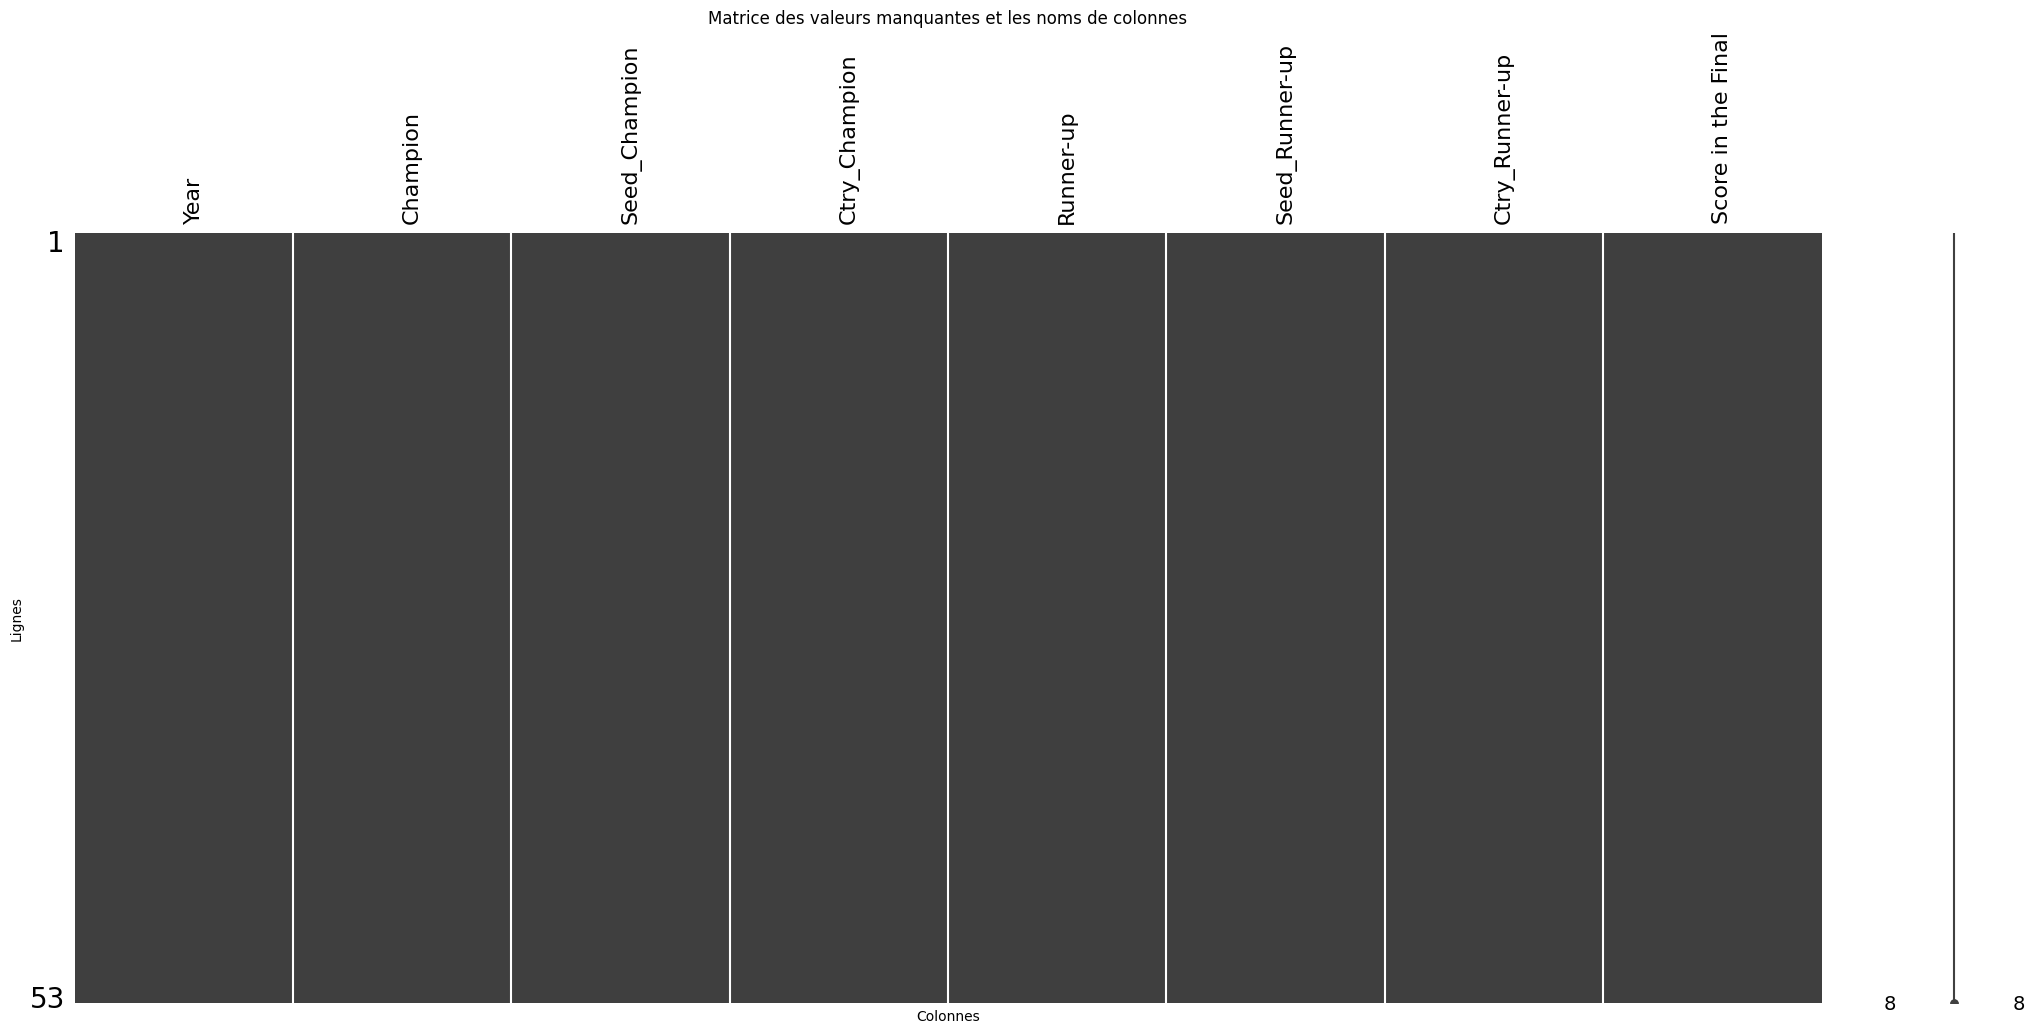

In [32]:
#Vérifier les données manquantes 
def profil_données(nom_data):  
    msno.matrix(nom_data)
    noms_colonnes = nom_data.columns
    
    plt.title("Matrice des valeurs manquantes et les noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(noms_colonnes)), labels=noms_colonnes, rotation=90)
    plt.show()
profil_données(df1)

In [33]:
#Vérifier les types des données 
df1.dtypes

Year                   int64
Champion              object
Seed_Champion          int64
Ctry_Champion         object
Runner-up             object
Seed_Runner-up         int64
Ctry_Runner-up        object
Score in the Final    object
dtype: object

2.Nettoyage du dataset 'women'

In [56]:
def remove_index(df2):
    df2.set_index(df2.columns[0], inplace=True)
    df2.drop(columns=[df2.columns[0]], inplace=True)

def check_empty_columns(df):
    return df2.columns[df2.isnull().all()].tolist()

def plot_missing_data_profile(df2):
    msno.matrix(df2)
    plt.title("Matrice des valeurs manquantes et les noms de colonnes")
    plt.xlabel("Colonnes")
    plt.ylabel("Lignes")
    plt.xticks(ticks=range(len(df2.columns)), labels=df2.columns, rotation=90)
    plt.show()


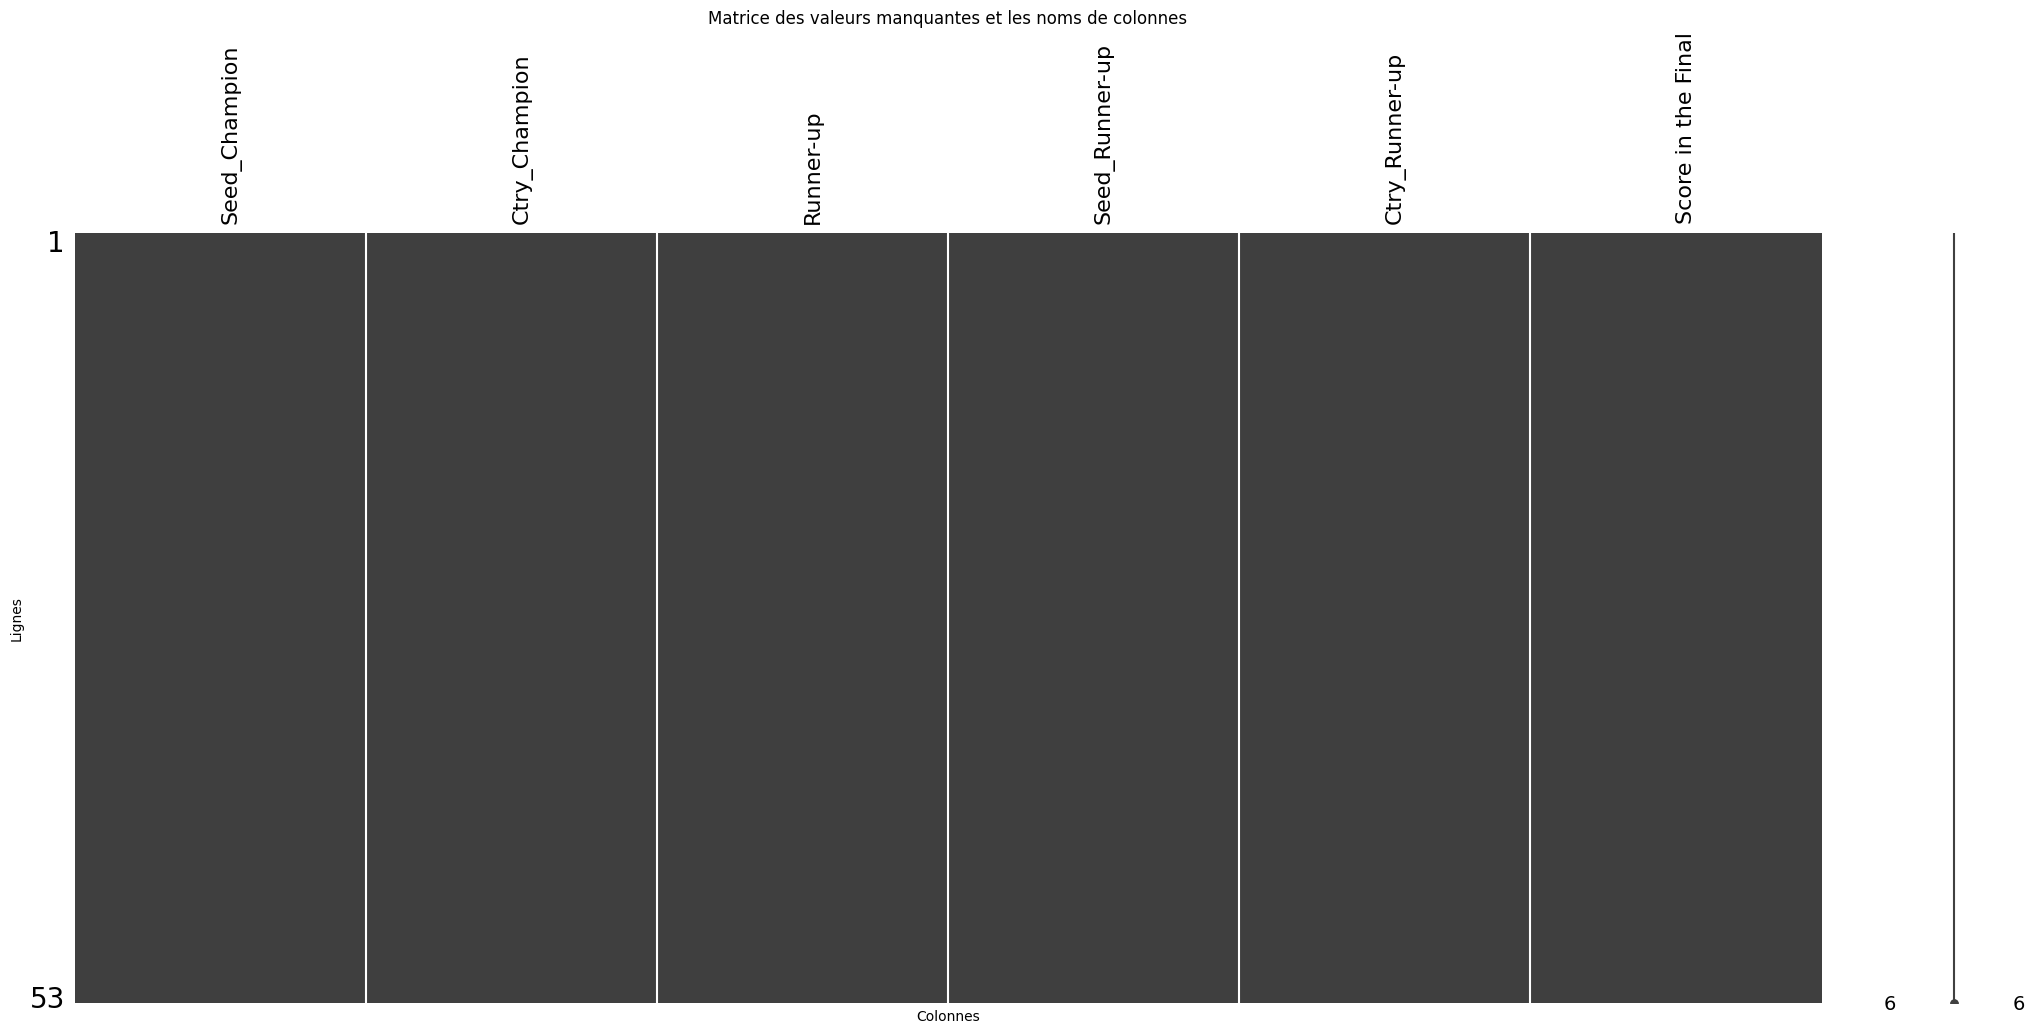

Colonnes vides: []
Types des données (ordonnés):
Seed_Champion          int64
Ctry_Champion         object
Runner-up             object
Seed_Runner-up         int64
Ctry_Runner-up        object
Score in the Final    object
dtype: object


In [60]:
remove_index(df2)
empty_columns = check_empty_columns(df2)
plot_missing_data_profile(df2)
print("Colonnes vides:", empty_columns)

data_types_ordered = df2[df1.columns].dtypes
print("Types des données (ordonnés):")
print(data_types_ordered)